<a href="https://colab.research.google.com/github/Abdulrahman-zazo/Face-Recognition-with-Data-Augmentation/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New section

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating: train/sad/Training_65526454.jpg  
  inflating: train/sad/Training_65531175.jpg  
  inflating

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 100s 219ms/step - accuracy: 0.2631 - loss: 1.7932 - val_accuracy: 0.3830 - val_loss: 1.5733
Epoch 2/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 102s 227ms/step - accuracy: 0.3612 - loss: 1.6326 - val_accuracy: 0.4411 - val_loss: 1.4763
Epoch 3/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 97s 215ms/step - accuracy: 0.4056 - loss: 1.5433 - val_accuracy: 0.4611 - val_loss: 1.4204
Epoch 4/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 142s 216ms/step - accuracy: 0.4145 - loss: 1.5045 - val_accuracy: 0.4700 - val_loss: 1.3771
Epoch 5/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 102s 227ms/step - accuracy: 0.4281 - loss: 1.4870 - val_accuracy: 0.4804 - val_loss: 1.3474
Epoch 6/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 141s 226ms/step - accuracy: 0.4403 - loss: 1.4480 - val_accuracy: 0.4894 - val_loss: 1.3345
Epoch 7/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 97s 215ms/step - accuracy: 0.4507 - loss: 1.4276 - val_accuracy: 0.4947 - val_loss: 1.3115
Epoch 8/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 97s 215ms/step - accuracy: 0.4550 - lo

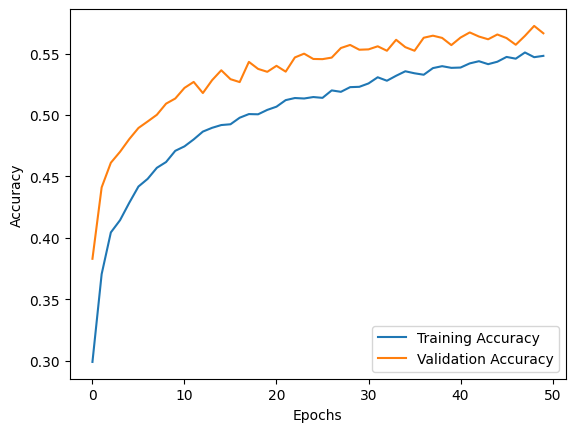

In [7]:
!pip install kaggle  # Install Kaggle
from google.colab import files

# Upload kaggle.json file (from your Kaggle account)
files.upload()

# Move the file to the desired path
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download FER2013 dataset
!kaggle datasets download -d msambare/fer2013
!unzip fer2013.zip

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Specify folder paths
train_dir = '/content/train'
test_dir = '/content/test'

# Setup ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values (0-255 → 0-1)
    rotation_range=20,       # Data augmentation: Rotate images
    horizontal_flip=True,    # Data augmentation: Horizontal flip
    zoom_range=0.1           # Data augmentation: Zoom
)

test_datagen = ImageDataGenerator(rescale=1./255)  # No augmentation for test data

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),   # Image size (should match model input)
    batch_size=64,
    color_mode='grayscale',  # Images are grayscale
    class_mode='categorical' # Multi-class classification
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_fer = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),  # Input shape 48x48
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 classes (emotions)
])

model_fer.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Multi-class classification
    metrics=['accuracy']
)

history_fer = model_fer.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator
)

import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history_fer.history['accuracy'], label='Training Accuracy')
plt.plot(history_fer.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Specify folder paths
train_dir = '/content/train'  # Path to the training folder
test_dir = '/content/test'
# Setup ImageDataGenerator without data augmentation
train_datagen_no_aug = ImageDataGenerator(rescale=1./255)

# Load the data
train_generator_no_aug = train_datagen_no_aug.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

# Train the model
history_fer_no_aug = model_fer.fit(
    train_generator_no_aug,
    epochs=50,
    validation_data=test_generator
)

Found 28709 images belonging to 7 classes.
Epoch 1/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 94s 208ms/step - accuracy: 0.5798 - loss: 1.0994 - val_accuracy: 0.5639 - val_loss: 1.1459
Epoch 2/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 87s 194ms/step - accuracy: 0.5970 - loss: 1.0461 - val_accuracy: 0.5807 - val_loss: 1.1112
Epoch 3/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 89s 197ms/step - accuracy: 0.6134 - loss: 0.9985 - val_accuracy: 0.5793 - val_loss: 1.1210
Epoch 4/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 140s 194ms/step - accuracy: 0.6353 - loss: 0.9644 - val_accuracy: 0.5769 - val_loss: 1.1268
Epoch 5/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 87s 195ms/step - accuracy: 0.6470 - loss: 0.9290 - val_accuracy: 0.5798 - val_loss: 1.1332
Epoch 6/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 86s 191ms/step - accuracy: 0.6628 - loss: 0.8835 - val_accuracy: 0.5832 - val_loss: 1.1383
Epoch 7/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 92s 206ms/step - accuracy: 0.6678 - loss: 0.8539 - val_accuracy: 0.5848 - val_loss: 1.1669
Epoch 8/50
449/449 ━━━━━━━━━━━━━━━━━━━━

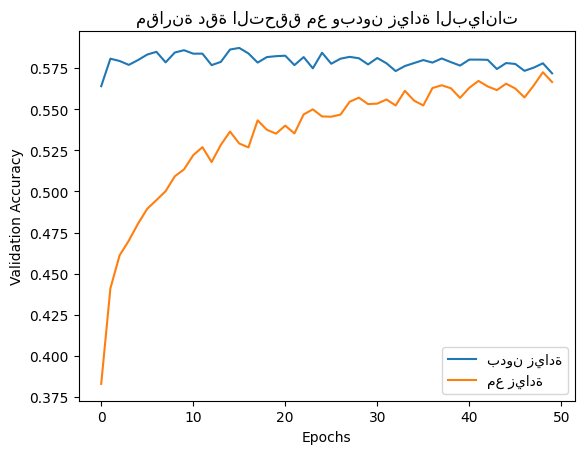

In [9]:
# Comparing results using graphs
plt.plot(history_fer_no_aug.history['val_accuracy'], label='Without Augmentation')
plt.plot(history_fer.history['val_accuracy'], label='With Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Comparison of Validation Accuracy with and without Data Augmentation')
plt.show()

# **طباعة عينة من البيانات**

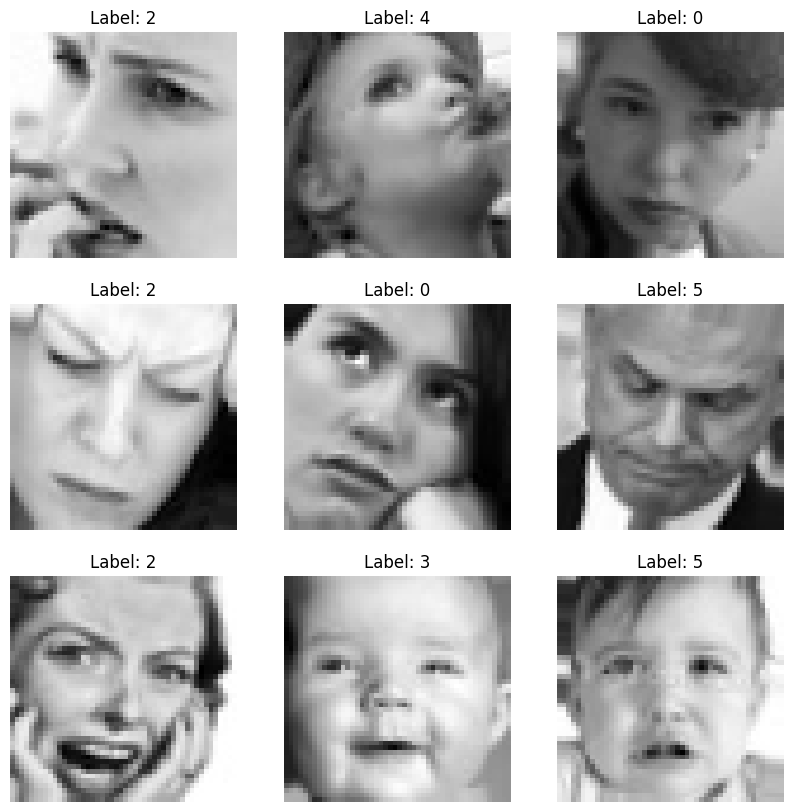

In [12]:
# Print samples of the data
# Display images from the training folder
import matplotlib.pyplot as plt
import numpy as np

batch = next(train_generator)
images, labels = batch[0], batch[1]

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f'Label: {np.argmax(labels[i])}')
    plt.axis('off')
plt.show()

In [13]:
# Adding new layers

model_improved = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),  # Additional layer
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256, activation='relu'),         # Increased units
    Dropout(0.5),
    Dense(7, activation='softmax')
])

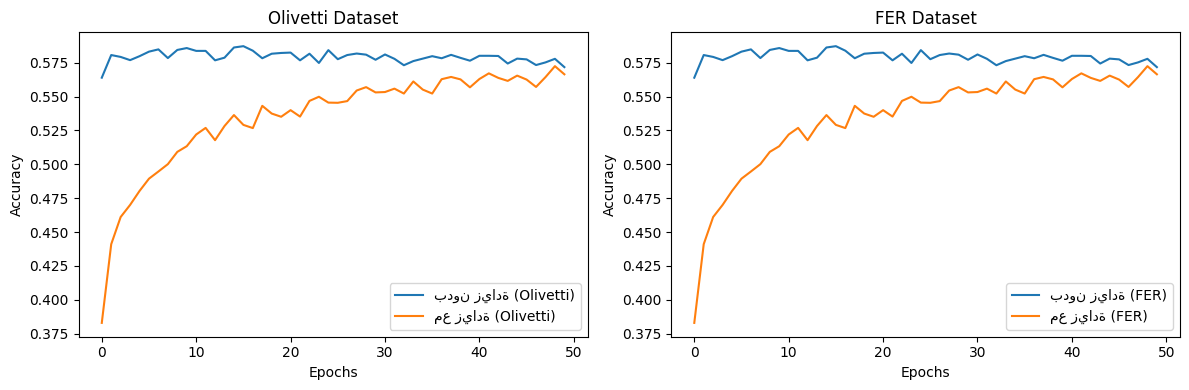

<Figure size 640x480 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt

# Plotting accuracy for Olivetti
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_fer_no_aug.history['val_accuracy'], label='Without Augmentation (Olivetti)')
plt.plot(history_fer.history['val_accuracy'], label='With Augmentation (Olivetti)')
plt.title('Olivetti Dataset')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting accuracy for FER
plt.subplot(1, 2, 2)
plt.plot(history_fer_no_aug.history['val_accuracy'], label='Without Augmentation (FER)')
plt.plot(history_fer.history['val_accuracy'], label='With Augmentation (FER)')
plt.title('FER Dataset')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

plt.savefig('results.png')